### Import libaries

In [1]:
import gc
import sys
import os 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Machine_Learning/scripts/")

In [3]:
from DataSetUp import *
from TreeCarPrice import *
%load_ext autoreload
%autoreload 2

### Import data and split into train and test 

In [4]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_onehot_data.csv")
features,y = data.drop("price",axis=1), data.price

In [5]:
data_setup = DataSetUp(features,y)

In [6]:
X_train,X_test,y_train,y_test = data_setup.data_split(2020,0.1)

### garbage collect

In [7]:
gc.collect()
%reset -f out

Flushing output cache (0 entries)


----
### Decision tree classifer 

* base model 

In [8]:
base_model = DecisionTreeRegressor(random_state=2020)

In [9]:
car_price_decision = treeCarPrice(base_model,True)

In [10]:
car_price_decision.regression_metrics(X_train,y_train,ind="train")

,r2_score,rmse,price_diff_abs_max
train,0.95629,2067.865839,488.333333


In [29]:
car_price_decision.regression_metrics(X_test,y_test,ind="test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.936699,2426.924577,270.222222


In [12]:
car_price_decision._trained_model.max_features_

219

### Much better as compared to a linear regression model with elasticnet regularization. 

### Let's perform gridsearch to see if we can further improve the result

#### Key parameters:
  * max_depth: default None
  * min_samples_split: repeat of max_depth, default 2 
  * min_samples_leaf:default 1 
  * max_features: default None (n_features)

In [13]:
params = {
    "max_features":[0.8,"sqrt","log2","auto",None,0.9]
}

In [14]:
car_price_decision.param_search(params,X_train,y_train,V=0)

In [15]:
car_price_decision.search_result.best_params_

{'max_features': 'auto'}

In [16]:
car_price_decision.search_result.best_estimator_.max_features_

219

In [17]:
decision_tree_tuned = car_price_decision.search_result.best_estimator_

In [26]:
car_price_decision.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.95629,2067.865839,488.333333


In [27]:
car_price_decision.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.936699,2426.924577,270.222222


### all features, the same as default tree params

### Let's look at feature importance

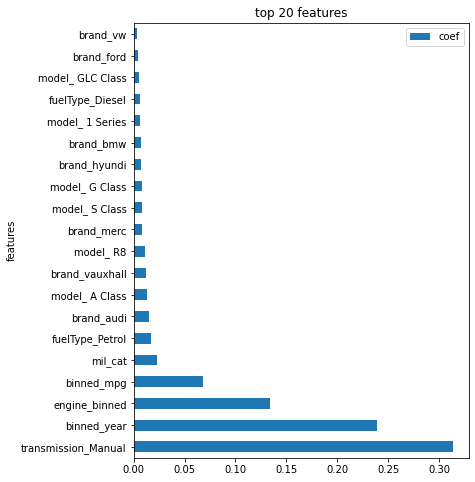

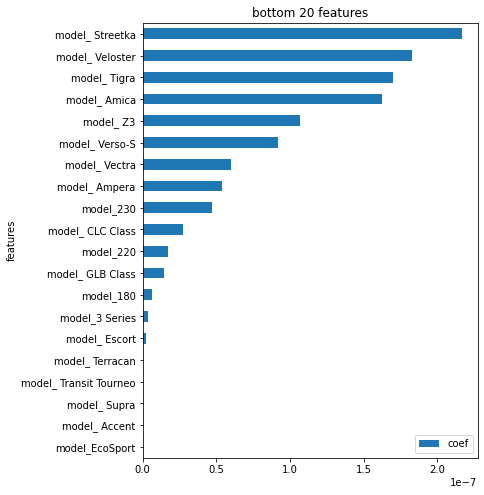

In [30]:
feature_table = car_price_decision.linear_feature_importance(features,plot=True)

### feature importance ranking is quite different from linear regression model.

### Looking at cases big price difference and small price difference

In [31]:
price_table_decision = car_price_decision.price_diff(features,y)

In [33]:
price_table_decision.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,488.333333,488.333333
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,456.481481,456.481481
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,325.516674,325.516674
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,323.613917,323.613917
71817,1,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,270.222222,270.222222
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,263.753724,263.753724
44553,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,250.713649,250.713649
12301,2,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,249.186483,249.186483
78800,2,2,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,244.627917,244.627917
83274,2,3,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,243.883522,243.883522


In [34]:
price_table_decision.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
20085,4,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
64473,3,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
64478,3,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20060,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20054,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20051,2,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
86112,3,2,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.0
20047,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20044,3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0


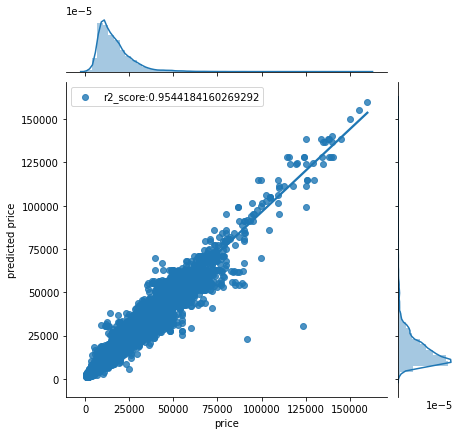

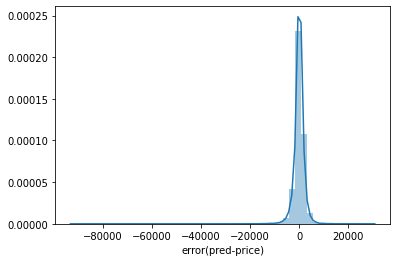

In [35]:
car_price_decision.plot_pred_price(features,y)

### Let's see if an ensemble method would improve the outcome

In [36]:
base_forest = RandomForestRegressor(random_state=2020)

In [37]:
car_price_forest = treeCarPrice(base_forest,False)

In [38]:
car_price_forest.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.955037,2097.290228,517.68299


In [39]:
car_price_forest.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.940397,2354.971821,245.860431


### Slightly better than decision tree in terms of R2

#### Let's tune with gridsearch

#### Key parameters:

* n_estimators: default 100 
* max_features: default auto (all feautres) sqrt, log2 
* max_samples: if boostrap is true, num of samples draw from X to train , default =None, all samples


In [40]:
params_forest = {
    "n_estimators":[50,100,200,300],
    "max_samples":[None,0.8,0.9]   
}

In [ ]:
car_price_forest.param_search(params_forest,X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:  1.1min


In [ ]:
forest_tuned_model = car_price_forest.search_result.best_estimator_

In [ ]:
car_price_forest.search_result.best_params_

In [ ]:
car_price_forest.regression_metrics(X_train,y_train,"train")

In [ ]:
car_price_forest.regression_metrics(X_test,y_test,"test",retrain=False)

<!-- ### plot trees -->

### same as default model 

### Let's look at feature importances

In [ ]:
feature_table = car_price_forest.linear_feature_importance(features)

In [ ]:
price_table_forest = car_price_forest.price_diff(features,y)

In [ ]:
price_table_forest.head(25)

In [ ]:
price_table_forest.tail(25)

In [ ]:
car_price_forest.plot_pred_price(features,y)

#### Tend to over predict price on old car with high milage. 

### Top features are similar among tree and random forest. Bottom features are relatively similar as well

### Let's look at how xgboost work:

In [44]:
xg_model = XGBRegressor(objective="reg:squarederror",seed=2020)
car_price_xg = treeCarPrice(xg_model,False)

In [ ]:
car_price_xg.regression_metrics(X_train,y_train,"train")

In [ ]:
car_price_xg.regression_metrics(X_train,y_train,"test")

,r2_score,rmse,price_diff_abs_max
train,0.930023,2603.839290,802.624177
test,0.917342,2896.861313,477.669271


### GridSearchTuning

### Key parameters:
* learning_rate
* n_estimators
* subsample
* colsample_bytree

In [46]:
params = {
    "learning_rate":[0.25,0.5],
    "n_estimators":[150,200,250],
    "subsample":[0.9,0.8,0.7],
    "colsample_bytree":[1.0,0.9]
}

In [47]:
car_price_xg.param_search(params,X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=22)]: Done 180 out of 180 | elapsed: 17.5min finished


In [48]:
car_price_xg_tuned = car_price_xg.search_result.best_estimator_
car_price_xg.reset_trained_model(car_price_xg_tuned)

In [49]:
car_price_xg.regression_metrics(X_train,y_train,X_test,y_test,False)

,r2_score,rmse,price_diff_abs_max
train,0.949034,2222.163814,696.000602
test,0.934053,2587.521411,433.595427


### xgboost slightly outperforms random forest and decision tree. 

### Look at the features

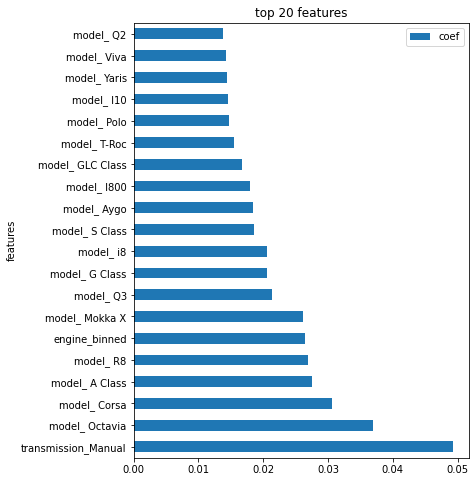

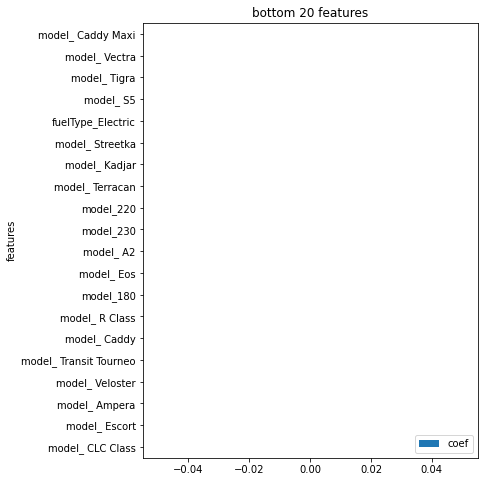

In [50]:
feature_table_xg = car_price_xg.linear_feature_importance()

### Let's see if we can remove bottom features to improve the performance

In [51]:
car_price_xg.removeFeatures(20)

In [52]:
X_train_trimmed,X_test_trimmed,y_train_trimmed,y_test_trimmed = car_price_xg.data_split(1988,0.1)

In [53]:
car_price_xg.regression_metrics(X_train_trimmed,y_train_trimmed,X_test_trimmed,y_test_trimmed,True)

,r2_score,rmse,price_diff_abs_max
train,0.949034,2222.163814,696.000602
test,0.934053,2587.521411,433.595427


### Same metrics but with less features 
___

### Look at returns with big and small deta

In [54]:
price_diff_xg = car_price_xg.price_diff

In [55]:
price_diff_xg.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_200,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,696.000602,696.000602
72016,1,5,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,433.595427,433.595427
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,427.259603,427.259603
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,396.540601,396.540601
69135,1,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,362.670356,362.670356
11821,1,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,336.932177,336.932177
72349,1,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,325.249146,325.249146
11984,1,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,325.091116,325.091116
71819,1,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,312.861456,312.861456
71617,1,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,311.966373,311.966373


In [56]:
price_diff_xg.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_200,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
38912,3,3,4,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.005197,0.005197
69573,3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.005148,0.005148
24879,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.004940,0.004940
205,4,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-0.004841,0.004841
13142,4,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.004388,0.004388
25545,4,2,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,-0.004271,0.004271
77287,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.004074,0.004074
80657,4,1,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.003490,0.003490
74168,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.003317,0.003317
75954,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.003317,0.003317


### Most of these cars are older cars.
___

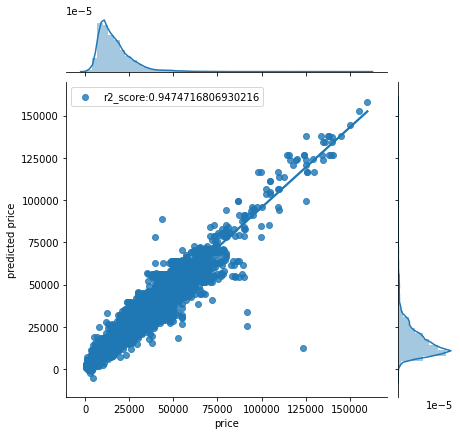

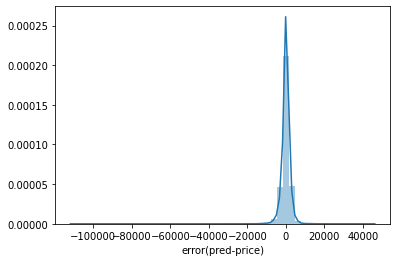

In [57]:
car_price_xg.plot_pred_price

### All three tree regressor models tend to have issues with older car especially if the car has lower mileage. 
___